<pre>
-----------------------------------------
<strong>A1 Regression Model Development</strong>
<strong>Machine Learning - DAT-5303 - VMsBA1</strong>
----------------------------------------

Carolina Játiva
January 20, 2021
<pre>

<pre>
<strong>Feature Engineering</strong>

Importing packages and the dataset:
</pre>

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

# reading the file into Python
apprentice = pd.read_excel(io = file)

# checking the file
apprentice.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# Printing dimensions of dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features: {apprentice.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features: 28



In [3]:
# Information about variables
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

<pre>
Renaming variable 'LARGEST_ORDER_SIZE' to 'AVG_NUM_MEALS'
</pre>

In [4]:
apprentice.rename(columns = {'LARGEST_ORDER_SIZE':'AVG_NUM_MEALS'}, inplace = True) 

In [5]:
# descriptive statistics for numeric data
apprentice.describe(include = 'number').round(decimals=2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_NUM_MEALS,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


<pre>
<strong>Missing Values</strong>
Next, we look at the missing values in the dataset and found that the FAMILY_NAME variable had 47 missing values. Which, was inputed with 'Unknown'.
</pre>

In [6]:
#using method chaining to show the number of missing values in the dataset
apprentice.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
AVG_NUM_MEALS                   0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [7]:
# looping to detect features with missing values
for col in apprentice:

    # creating columns with 1s if missing and 0 if not
    if apprentice[col].isnull().astype(int).sum() > 0:
        apprentice['m_'+col] = apprentice[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
apprentice[    ['m_FAMILY_NAME']    ].sum(axis = 0)

m_FAMILY_NAME    47
dtype: int64

In [8]:
# instantiating an imputation value
fill = 'Unknown'

# imputing 'Mas Vnr Area'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill) 

# making sure all missing values have been taken care of
apprentice.isnull().any().any()

False

<pre>
Based on the previous output, we can identify the variables in the dataset with the following groupings:

<strong>Categorization of the Dataset Variables</strong>
-----------------------
<strong>CONTINUOUS</strong>
-----------------------
REVENUE (Y-variable)
TOTAL_MEALS_ORDERED   
AVG_TIME_PER_SITE_VISIT 
WEEKLY_PLAN
AVG_PREP_VID_TIME
TOTAL_PHOTOS_VIEWED

-----------------------
<strong>INTERVAL/COUNT </strong>
-----------------------
UNIQUE_MEALS_PURCH 
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_BEFORE_NOON    
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
EARLY_DELIVERIES
LATE_DELIVERIES
AVG_NUM_MEALS 
MASTER_CLASSES_ATTENDED
AVG_CLICKS_PER_VISIT 

-----------------------
<strong> CATEGORICAL </strong>
-----------------------
CROSS_SELL_SUCCESS
NAME
EMAIL 
FIRST_NAME  
FAMILY_NAME  
MOBILE_NUMBER
TASTES_AND_PREFERENCES  
PACKAGE_LOCKER
REFRIGERATED_LOCKER
MEDIAN_MEAL_RATING 
<pre>

<pre>
<strong>CONTINUOUS VARIABLES </strong>
Looking to the distribution of our Y-variable: Revenue, we can see that it is positively skewed, so it should be log transformed. The X-variables were also checked for skewness and were log transformed.
</pre>

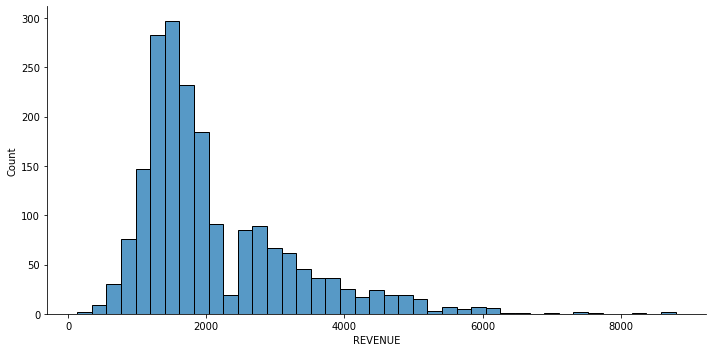

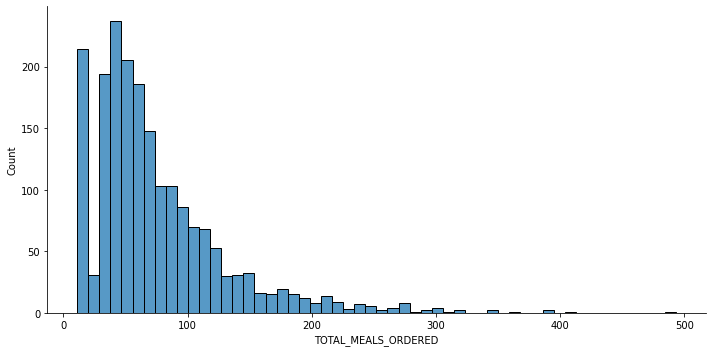

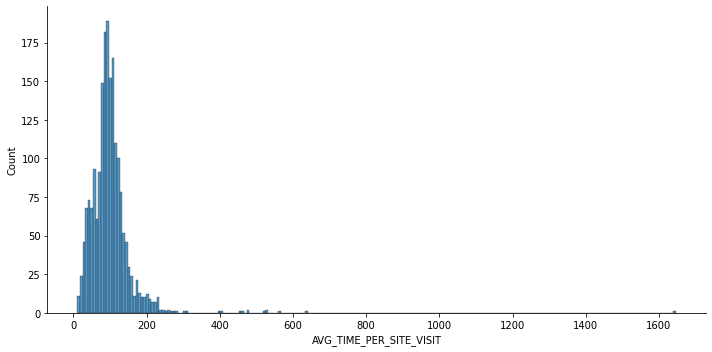

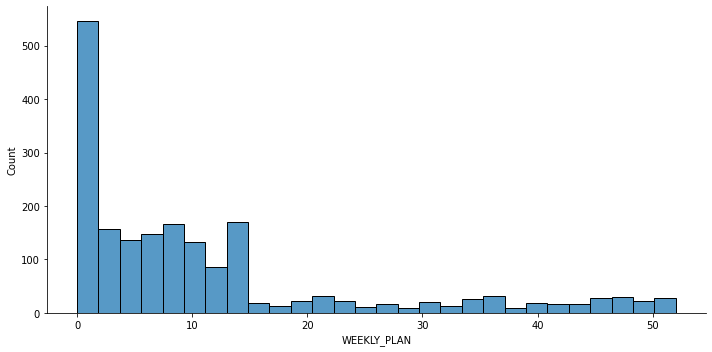

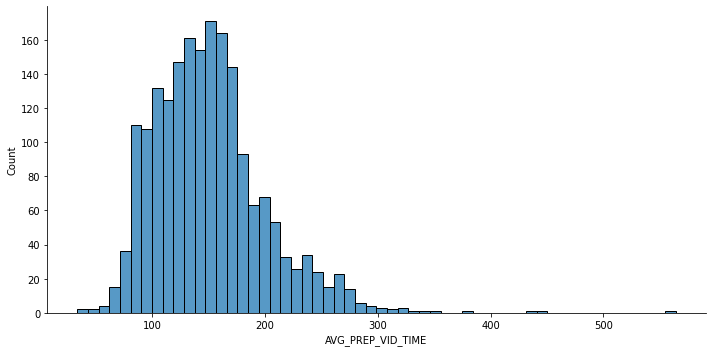

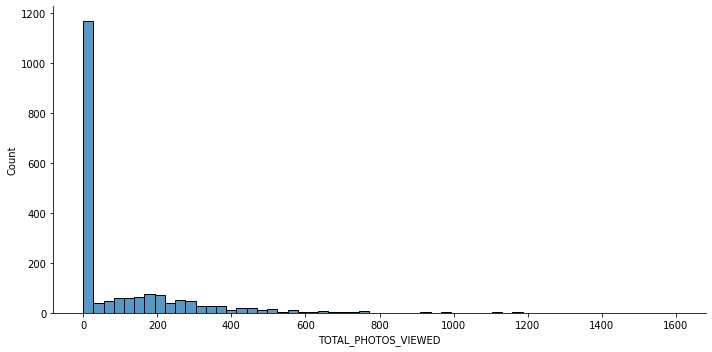

In [9]:

########################
# Visual EDA (Histograms)
########################


# developing a histogram of Revenue
sns.displot(data   = apprentice,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

plt.show()



# developing a histogram of Total Meals Ordered
sns.displot(data   = apprentice,
            x      = 'TOTAL_MEALS_ORDERED',
            height = 5,
            aspect = 2)
plt.show()


# developing a histogram of Average Time per Site Visit
sns.displot(data   = apprentice,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)
plt.show()



# developing a histogram of Weekly Plan
sns.displot(data   = apprentice,
            x      = 'WEEKLY_PLAN',
            height = 5,
            aspect = 2)
plt.show()


# developing a histogram of Average Prep Vid Time
sns.displot(data   = apprentice,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)
plt.show()

# developing a histogram of Total Photos Viewed
sns.displot(data   = apprentice,
            x      = 'TOTAL_PHOTOS_VIEWED',
            height = 5,
            aspect = 2)

plt.show()

In [10]:
# log transforming Revenue and the X-variables and saving it to the dataset
apprentice['LOG_REVENUE'] = np.log10(apprentice['REVENUE'])
apprentice['LOG_TOTAL_MEALS_ORDERED'] = np.log10(apprentice['TOTAL_MEALS_ORDERED']+1)
apprentice['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprentice['AVG_TIME_PER_SITE_VISIT']+1)
apprentice['LOG_WEEKLY_PLAN'] = np.log10(apprentice['WEEKLY_PLAN']+1)
apprentice['LOG_AVG_PREP_VID_TIME'] = np.log10(apprentice['AVG_PREP_VID_TIME']+1)
apprentice['TOTAL_PHOTOS_VIEWED'] = np.log10(apprentice['TOTAL_PHOTOS_VIEWED']+1)


<pre>
Consequently, we look at the scatterplots of the Continous Variables and it is evident that several variables have a high amount of zero values.
</pre>

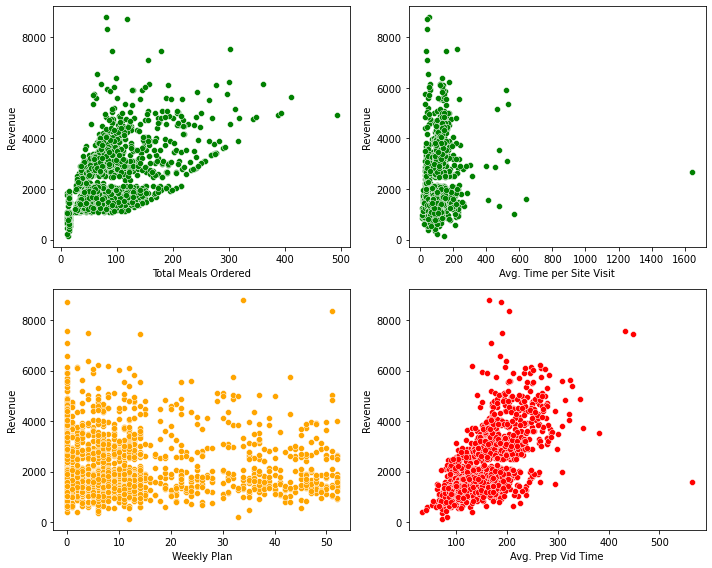

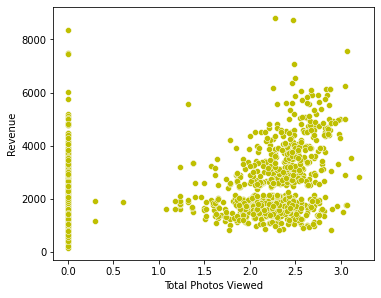

In [11]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avg. Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avg. Prep Vid Time')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<pre>
Therefore, we checked that the variables had at least 100 observations on both sides of the flag (1s and 0s).
</pre>

In [12]:
# counting the number of zeroes
totalmeals_zeroes   = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] == 0])
avgtpv_zeroes   = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] == 0])
weeklyp_zeroes  = len(apprentice['WEEKLY_PLAN'][apprentice['WEEKLY_PLAN'] == 0])
avgprep_zeroes  = len(apprentice['AVG_PREP_VID_TIME'][apprentice['AVG_PREP_VID_TIME'] == 0])
photosv_zeroes  = len(apprentice['TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] == 0])

# printing a table of the results
print(f"""
                    No\t\tYes
               ---------------------
Total Meals Ordered |{totalmeals_zeroes} \t\t{len(apprentice) - totalmeals_zeroes}
Avg. Time per Visit |{avgtpv_zeroes}\t\t {len(apprentice) - avgtpv_zeroes}
Weekly Plan         |{weeklyp_zeroes}\t {len(apprentice) - weeklyp_zeroes}
Avg.Prep Vid Time   |{avgprep_zeroes}\t\t {len(apprentice) - avgprep_zeroes}
Total Photos Viewed |{photosv_zeroes}\t {len(apprentice) - photosv_zeroes}

""")


                    No		Yes
               ---------------------
Total Meals Ordered |0 		1946
Avg. Time per Visit |0		 1946
Weekly Plan         |468	 1478
Avg.Prep Vid Time   |0		 1946
Total Photos Viewed |1140	 806




<pre>
Given the previous table, we engineer flag features for the variables that have at least 100 observations in columns 'No' and 'Yes'. An exception was made on Average Time per Visit considering that it is a variable of interest.
</pre>

In [13]:
#Creating dummy variables for variables that have at least 100 observations in both yes and no
apprentice['HAS_WEEKLY_PLAN']   = 0
apprentice['HAS_PHOTOS_VIEWED'] = 0


for index, value in apprentice.iterrows():
    
    # Weekly Plan
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 0:
        apprentice.loc[index, 'HAS_WEEKLY_PLAN'] = 1


    # Total Photos Viewed
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice.loc[index, 'HAS_PHOTOS_VIEWED'] = 1
        

<pre>
<strong>INTERVAL/COUNT VARIABLES </strong>
The next step to take was to work with Interval and Count variables. First, looking at the boxplots to visualize if there is a linear trend that connects the median lines. If there was not a linear trend, a log transformation took place. 
</pre>

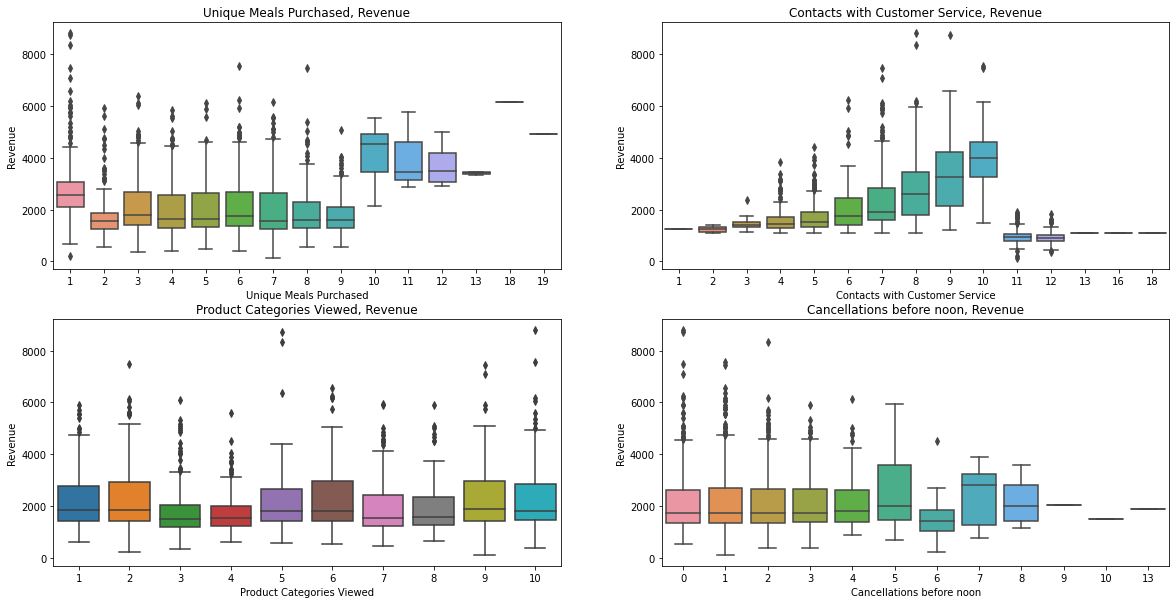

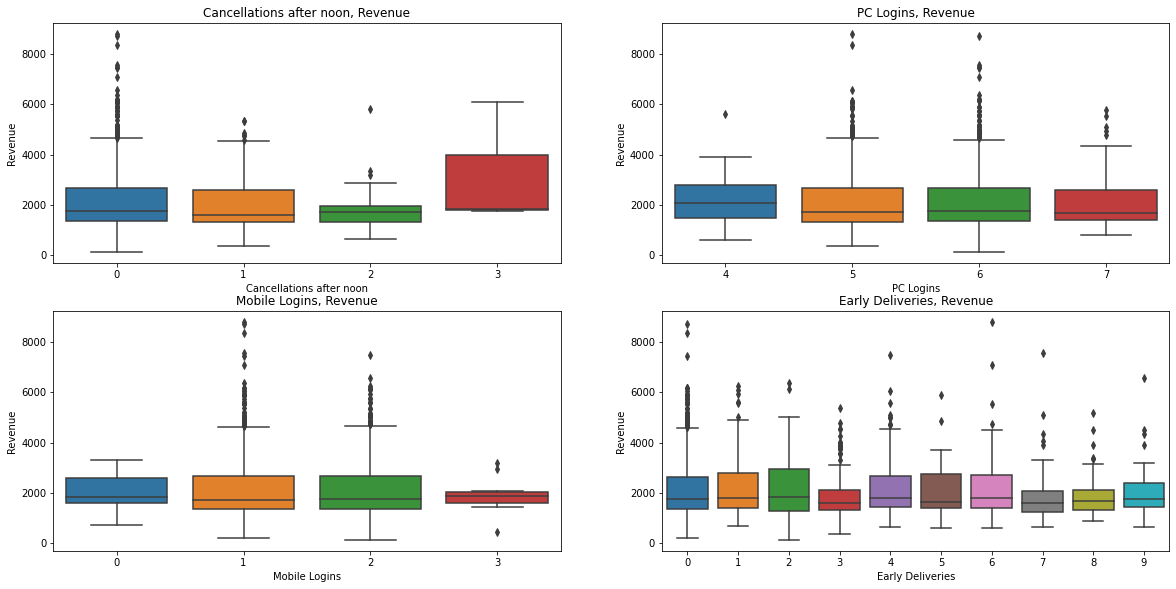

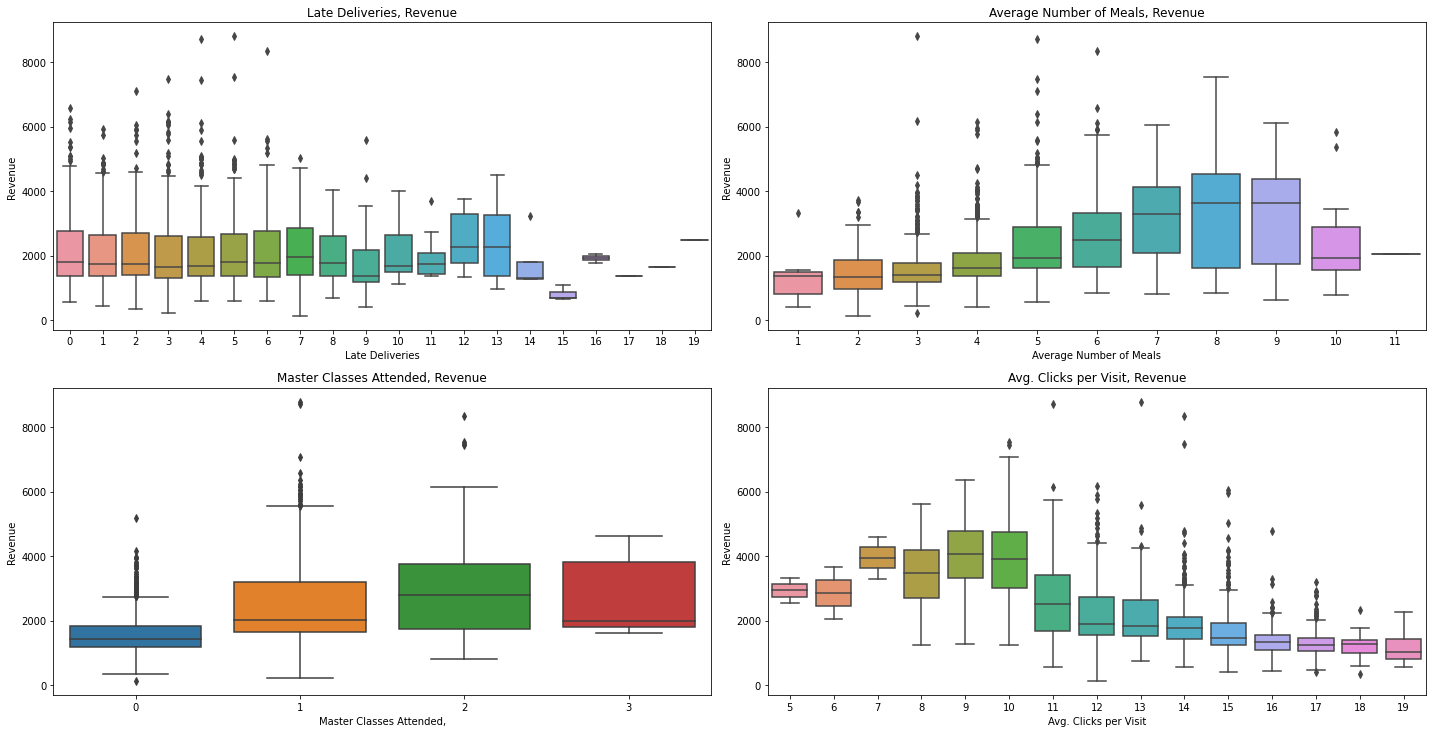

In [14]:
# setting figure size
fig, ax = plt.subplots(figsize = (20, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'UNIQUE_MEALS_PURCH',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Unique Meals Purchased, Revenue')
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Revenue')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Contacts with Customer Service, Revenue')
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'Revenue')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'PRODUCT_CATEGORIES_VIEWED',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Product Categories Viewed, Revenue')
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'CANCELLATIONS_BEFORE_NOON',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Cancellations before noon, Revenue')
plt.xlabel(xlabel = 'Cancellations before noon')
plt.ylabel(ylabel = 'Revenue')

# setting figure size
fig, ax = plt.subplots(figsize = (20, 15))




## Plot 1: Log X, Log Y ##
plt.subplot(3, 2, 1)
sns.boxplot(x     = 'CANCELLATIONS_AFTER_NOON',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Cancellations after noon, Revenue')
plt.xlabel(xlabel = 'Cancellations after noon')
plt.ylabel(ylabel = 'Revenue')



## Plot 1: Log X, Log Y ##
plt.subplot(3, 2, 2)
sns.boxplot(x     = 'PC_LOGINS',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'PC Logins, Revenue')
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')

## Plot 1: Log X, Log Y ##
plt.subplot(3, 2, 3)
sns.boxplot(x     = 'MOBILE_LOGINS',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Mobile Logins, Revenue')
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Revenue')

## Plot 1: Log X, Log Y ##
plt.subplot(3, 2, 4)
sns.boxplot(x     = 'EARLY_DELIVERIES',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Early Deliveries, Revenue')
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')



# setting figure size
fig, ax = plt.subplots(figsize = (20, 20))

## Plot 1: Log X, Log Y ##
plt.subplot(4, 2, 1)
sns.boxplot(x     = 'LATE_DELIVERIES',
            y     = 'REVENUE',
            data  = apprentice)
# titles and labels
plt.title(label   = 'Late Deliveries, Revenue')
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

## Plot 1: Log X, Log Y ##
plt.subplot(4, 2, 2)
sns.boxplot(x     = 'AVG_NUM_MEALS',
            y     = 'REVENUE',
            data  = apprentice)
# titles and labels
plt.title(label   = 'Average Number of Meals, Revenue')
plt.xlabel(xlabel = 'Average Number of Meals')
plt.ylabel(ylabel = 'Revenue')

## Plot 1: Log X, Log Y ##
plt.subplot(4, 2, 3)
sns.boxplot(x     = 'MASTER_CLASSES_ATTENDED',
            y     = 'REVENUE',
            data  = apprentice)
# titles and labels
plt.title(label   = 'Master Classes Attended, Revenue')
plt.xlabel(xlabel = 'Master Classes Attended,')
plt.ylabel(ylabel = 'Revenue')

## Plot 1: Log X, Log Y ##
plt.subplot(4, 2, 4)
sns.boxplot(x     = 'AVG_CLICKS_PER_VISIT',
            y     = 'REVENUE',
            data  = apprentice)
# titles and labels
plt.title(label   = 'Avg. Clicks per Visit, Revenue')
plt.xlabel(xlabel = 'Avg. Clicks per Visit')
plt.ylabel(ylabel = 'Revenue')


## displaying the visuals ##
plt.tight_layout()
plt.show()

<pre>
Based on the boxplots, some new variables were feature engineered considering that they could provide some extra hints to the model. 
</pre>

In [15]:
#Total online logins
apprentice['ONLINE_LOGINS'] = apprentice['MOBILE_LOGINS'] + apprentice['PC_LOGINS']

#Ratio of Product Categories Viewed and Total Meals Ordered
apprentice['PROD_CAT_ONLINE_LOG'] = apprentice['PRODUCT_CATEGORIES_VIEWED'] /apprentice['ONLINE_LOGINS']

#Ratio of Total Logins and Total Meals Ordered
apprentice['MOB_LOGINS_PER_ORDERS'] = apprentice['ONLINE_LOGINS'] /apprentice['TOTAL_MEALS_ORDERED']

#Ratio of Total Logins and Total Meals Ordered
apprentice['AVG_MEAL_PER_MOB_LOGINS'] = apprentice['AVG_NUM_MEALS'] /apprentice['ONLINE_LOGINS']

#Ratio of Late Deliveries and Total Meals Ordered
apprentice['LATE_DEL_PER_ORDERS'] = apprentice['LATE_DELIVERIES'] /apprentice['TOTAL_MEALS_ORDERED']

#Ratio of Early Deliveries and Total Meals Ordered
apprentice['EAR_DEL_PER_ORDERS'] = apprentice['EARLY_DELIVERIES'] /apprentice['TOTAL_MEALS_ORDERED']

# total deliveries out of schedule
apprentice['DELIV_OUT_SCHED'] = apprentice['EARLY_DELIVERIES'] + apprentice['LATE_DELIVERIES']

#Avg Meal price
apprentice['AVG_MEAL_PRICE'] = apprentice['REVENUE']/apprentice['TOTAL_MEALS_ORDERED'].round(2)

# ratio between num of contact with customer service and average number of meals ordered
apprentice['AVG_MEALS_N_CUSTOMER_SERVICE'] = apprentice['CONTACTS_W_CUSTOMER_SERVICE']/ apprentice['AVG_NUM_MEALS']

# ratio between out of schedule deliveries and total meals ordered
apprentice['OUT_OF_SCHEDULE_DELIVERIES_RATIO'] = apprentice['DELIV_OUT_SCHED'] / apprentice['TOTAL_MEALS_ORDERED']

# adding up all the cancellations
apprentice['TOTAL_CANCELLATIONS'] = apprentice['CANCELLATIONS_BEFORE_NOON'] + apprentice['CANCELLATIONS_AFTER_NOON']

# ratio between cancellations before noon and total meals ordered
apprentice['CANCELLATIONS_BEFORE_NOON_RATIO'] = apprentice['CANCELLATIONS_BEFORE_NOON'] / apprentice['TOTAL_MEALS_ORDERED']

# ratio between cancellations after noon and total meals ordered
apprentice['CANCELLATIONS_AFTER_NOON_RATIO'] = apprentice['CANCELLATIONS_AFTER_NOON'] / apprentice['TOTAL_MEALS_ORDERED']

# ratio between all cancellations and total meals ordered
apprentice['CANCELLATIONS_RATIO'] = apprentice['TOTAL_CANCELLATIONS'] / apprentice['TOTAL_MEALS_ORDERED']


#Ratio of Avg Clicks per visit over total meals ordered
apprentice['CLICKS_CONV'] = apprentice['AVG_CLICKS_PER_VISIT'] /apprentice['TOTAL_MEALS_ORDERED']

Text(0, 0.5, 'Revenue')

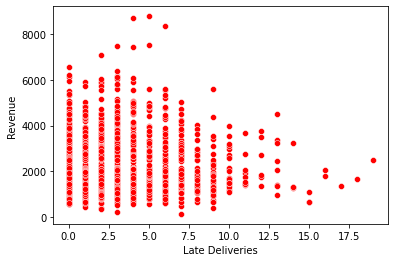

In [16]:
## Plot 2: Log X, Original Y ##
import seaborn as sns
sns.scatterplot(x = apprentice['LATE_DELIVERIES'],
            y     = apprentice['REVENUE'],
            color = 'red')

# titles and labels
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

Text(0, 0.5, 'Revenue')

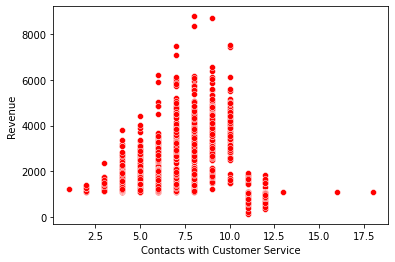

In [17]:
## Plot 2: Log X, Original Y ##
import seaborn as sns
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
            y     = apprentice['REVENUE'],
            color = 'red')

# titles and labels
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'Revenue')

Text(0, 0.5, 'Revenue')

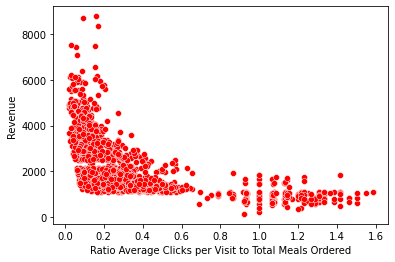

In [18]:
## Plot 2: Log X, Original Y ##
import seaborn as sns
sns.scatterplot(x = apprentice['CLICKS_CONV'],
            y     = apprentice['REVENUE'],
            color = 'red')

# titles and labels
plt.xlabel(xlabel = 'Ratio Average Clicks per Visit to Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')

Text(0, 0.5, 'Revenue')

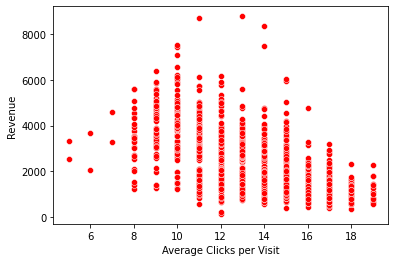

In [19]:
## Plot 2: Log X, Original Y ##
import seaborn as sns
sns.scatterplot(x = apprentice['AVG_CLICKS_PER_VISIT'],
            y     = apprentice['REVENUE'],
            color = 'red')

# titles and labels
plt.xlabel(xlabel = 'Average Clicks per Visit')
plt.ylabel(ylabel = 'Revenue')


<pre>
The following log trasnformations created a better linear relationship between the Count Variables and Revenue based on the boxplots. 
</pre>

In [20]:
#Log transforming to the variables that didn't show a linear relationship
apprentice['LOG_UNIQUE_MEALS_PURCH'] = np.log10(apprentice['UNIQUE_MEALS_PURCH'])
apprentice['LOG_CANCELLATIONS_BEFORE_NOON'] = np.log10(apprentice['CANCELLATIONS_BEFORE_NOON']+1)
apprentice['LOG_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice['CONTACTS_W_CUSTOMER_SERVICE'])
apprentice['LOG_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprentice['PRODUCT_CATEGORIES_VIEWED'])
apprentice['LOG_AVG_NUM_MEALS'] = np.log10(apprentice['AVG_NUM_MEALS'])
apprentice['LOG_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprentice['PRODUCT_CATEGORIES_VIEWED'])
apprentice['LOG_MOBILE_LOGINS'] = np.log10(apprentice['MOBILE_LOGINS']+1)
apprentice['LOG_MASTER_CLASSES_ATTENDED'] = np.log10(apprentice['MASTER_CLASSES_ATTENDED']+1)

<pre>
<strong>CATEGORICAL VARIABLES </strong>
The next step taken was to split emails in order to categorize them based on the domain. The categories for the domains are: professional, personal and junk. 
</pre>

In [21]:
# Splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    #print(split_email)
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df.columns = ['NAME', 'EMAIL_DOMAIN']

#email_df["domain"].value_counts()

apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']], 
                       axis = 1)

In [22]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', 
                            '@boeing.com', '@caterpillar.com', 
                            '@chevron.com','@cisco.com', '@cocacola.com', 
                            '@disney.com', '@dupont.com', '@exxon.com', 
                            '@ge.org', '@goldmansacs.com', '@homedepot.com', 
                            '@ibm.com', '@intel.com', '@jnj.com', 
                            '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                            '@microsoft.com','@nike.com', '@pfizer.com', 
                            '@pg.com', '@travelers.com', '@unitedtech.com', 
                            '@unitedhealth.com', '@verizon.com', '@visa.com', 
                            '@walmart.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', 
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('PERSONAL')
        
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
apprentice['DOMAIN_GROUP'] = pd.Series(placeholder_lst)  ## a series is a column in a dataframe


# checking results
apprentice['DOMAIN_GROUP'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: DOMAIN_GROUP, dtype: int64

In [23]:
# one hot encoding categorical variables
one_hot_email = pd.get_dummies(apprentice['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
apprentice = apprentice.drop('DOMAIN_GROUP', axis = 1)

# Joining the two df together
apprentice = apprentice.join([one_hot_email])


<pre>
The variable MEDIAN_MEAL_RATING was coded as a dummy variable, with the following 1:'POOR', 2:'FAIR', 3:'GOOD', 4:'VERY_GOOD', 5:'EXCELLENT'.
</pre>

In [24]:
# one hot encoding categorical variables
one_hot_meal_rating = pd.get_dummies(apprentice['MEDIAN_MEAL_RATING'])
one_hot_meal_rating = one_hot_meal_rating.rename(columns = {1:'POOR', 2:'FAIR', 3:'GOOD', 4:'VERY_GOOD', 5:'EXCELLENT'})

# dropping categorical variables after they've been encoded
apprentice = apprentice.drop('MEDIAN_MEAL_RATING', axis = 1)
# Joining the two df together
apprentice = apprentice.join([one_hot_meal_rating])

In [25]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [26]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = apprentice)


# checking results
apprentice['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

<pre>
<strong>Correlations</strong>
Next, we looked at the correlations between REVENUE and all our X-variables, including the new engineered variables.
</pre>

In [27]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)

# printing (Pearson) correlations with Revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                             1.00
LOG_REVENUE                         0.95
AVG_PREP_VID_TIME                   0.64
LOG_AVG_PREP_VID_TIME               0.63
LOG_TOTAL_MEALS_ORDERED             0.61
TOTAL_MEALS_ORDERED                 0.60
VERY_GOOD                           0.59
LOG_MASTER_CLASSES_ATTENDED         0.46
MASTER_CLASSES_ATTENDED             0.45
AVG_NUM_MEALS                       0.44
TOTAL_PHOTOS_VIEWED                 0.42
LOG_AVG_NUM_MEALS                   0.42
AVG_MEAL_PER_MOB_LOGINS             0.41
HAS_PHOTOS_VIEWED                   0.37
LOG_CONTACTS_W_CUSTOMER_SERVICE     0.17
LOG_AVG_TIME_PER_SITE_VISIT         0.15
AVG_TIME_PER_SITE_VISIT             0.14
CONTACTS_W_CUSTOMER_SERVICE         0.10
number_of_names                     0.04
EXCELLENT                           0.04
PRODUCT_CATEGORIES_VIEWED           0.03
MOBILE_NUMBER                       0.03
PROD_CAT_ONLINE_LOG                 0.03
PC_LOGINS                           0.02
LOG_CANCELLATION

<AxesSubplot:>

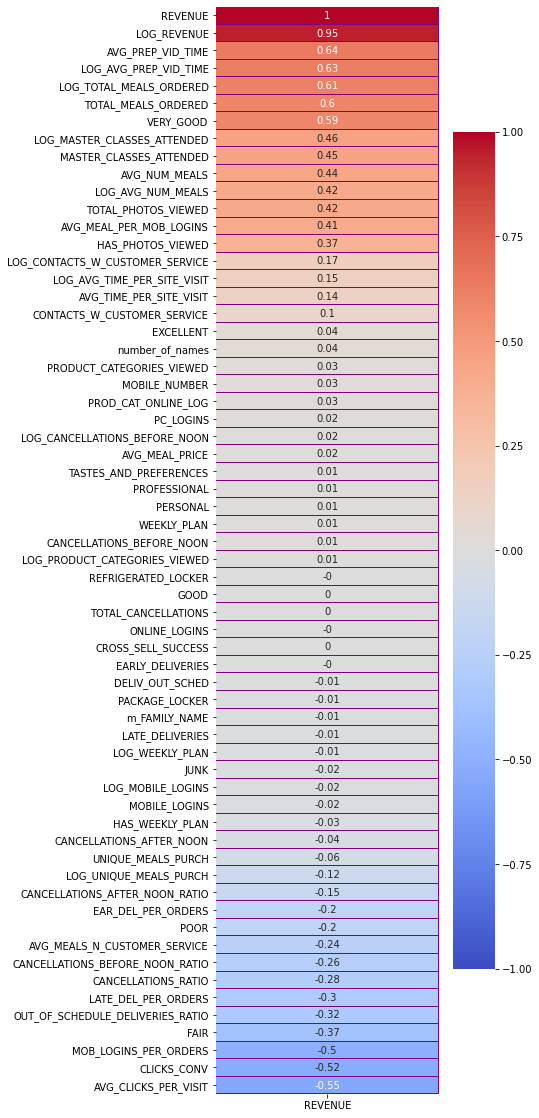

In [77]:
# Create a  Pearson correlation matrix
apprentice_corr = apprentice.corr().round(2)

plt.figure(figsize=(5,20))

# plot correlations 
sns.heatmap(apprentice_corr[['REVENUE']].sort_values(by=['REVENUE'],ascending=False),
            cmap='coolwarm', vmin=-1, vmax=1,linecolor='purple',linewidths=0.01,
            annot=True)

<pre>
<strong>Training and Testing Sets for Model Development </strong>
Next, we prepare the training and testing sets for developing the model.
</pre>


In [28]:
# preparing explanatory variable data (X data) 
apprentice_data   = apprentice.drop(['REVENUE','LOG_REVENUE',
                                 'NAME','EMAIL','FIRST_NAME', 
                                 'FAMILY_NAME', 'EMAIL_DOMAIN'], #other variables that should not be there
                               axis = 1)


# preparing response variables
apprentice_target = apprentice.loc[ : , 'REVENUE'] #target to call Y variable
log_apprentice_target = apprentice.loc[ : ,'LOG_REVENUE'] # ready for use later


# preparing training and testing sets (all letters are lowercase) #little xs 
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 60)
y-side: (1459,)


Testing Data
------------
X-side: (487, 60)
y-side: (487,)



In [29]:
# formatting each explanatory variable for statsmodels
for val in apprentice_data:
    print(val, '+')

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_NUM_MEALS +
MASTER_CLASSES_ATTENDED +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
LOG_TOTAL_MEALS_ORDERED +
LOG_AVG_TIME_PER_SITE_VISIT +
LOG_WEEKLY_PLAN +
LOG_AVG_PREP_VID_TIME +
HAS_WEEKLY_PLAN +
HAS_PHOTOS_VIEWED +
ONLINE_LOGINS +
PROD_CAT_ONLINE_LOG +
MOB_LOGINS_PER_ORDERS +
AVG_MEAL_PER_MOB_LOGINS +
LATE_DEL_PER_ORDERS +
EAR_DEL_PER_ORDERS +
DELIV_OUT_SCHED +
AVG_MEAL_PRICE +
AVG_MEALS_N_CUSTOMER_SERVICE +
OUT_OF_SCHEDULE_DELIVERIES_RATIO +
TOTAL_CANCELLATIONS +
CANCELLATIONS_BEFORE_NOON_RATIO +
CANCELLATIONS_AFTER_NOON_RATIO +
CANCELLATIONS_RATIO +
CLICKS_CONV +
LOG_UNIQUE_MEALS_PURCH

In [30]:
# saving feature-rich dataset in excel
apprentice.to_excel('Apprentice_OLS.xlsx',index = False)

<pre>
<strong>Ordinay Least Squares Regression </strong>
</pre>

In [31]:
# merging X_train and y_train so that they can be used in statsmodels
apprentice_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_FULL = smf.ols(formula =  """REVENUE ~ CROSS_SELL_SUCCESS +
                                TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                PRODUCT_CATEGORIES_VIEWED +
                                AVG_TIME_PER_SITE_VISIT +
                                MOBILE_NUMBER +
                                CANCELLATIONS_BEFORE_NOON +
                                CANCELLATIONS_AFTER_NOON +
                                TASTES_AND_PREFERENCES +
                                PC_LOGINS +
                                MOBILE_LOGINS +
                                WEEKLY_PLAN +
                                EARLY_DELIVERIES +
                                LATE_DELIVERIES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                AVG_PREP_VID_TIME +
                                AVG_NUM_MEALS +
                                MASTER_CLASSES_ATTENDED +
                                AVG_CLICKS_PER_VISIT +
                                TOTAL_PHOTOS_VIEWED +
                                m_FAMILY_NAME +
                                LOG_TOTAL_MEALS_ORDERED +
                                LOG_AVG_TIME_PER_SITE_VISIT +
                                LOG_WEEKLY_PLAN +
                                LOG_AVG_PREP_VID_TIME +
                                HAS_WEEKLY_PLAN +
                                HAS_PHOTOS_VIEWED +
                                ONLINE_LOGINS +
                                PROD_CAT_ONLINE_LOG +
                                MOB_LOGINS_PER_ORDERS +
                                AVG_MEAL_PER_MOB_LOGINS +
                                LATE_DEL_PER_ORDERS +
                                EAR_DEL_PER_ORDERS +
                                DELIV_OUT_SCHED +
                                AVG_MEAL_PRICE +
                                AVG_MEALS_N_CUSTOMER_SERVICE +
                                OUT_OF_SCHEDULE_DELIVERIES_RATIO +
                                TOTAL_CANCELLATIONS +
                                CANCELLATIONS_BEFORE_NOON_RATIO +
                                CANCELLATIONS_AFTER_NOON_RATIO +
                                CANCELLATIONS_RATIO +
                                CLICKS_CONV +
                                LOG_UNIQUE_MEALS_PURCH +
                                LOG_CANCELLATIONS_BEFORE_NOON +
                                LOG_CONTACTS_W_CUSTOMER_SERVICE +
                                LOG_PRODUCT_CATEGORIES_VIEWED +
                                LOG_AVG_NUM_MEALS +
                                LOG_MOBILE_LOGINS +
                                LOG_MASTER_CLASSES_ATTENDED +
                                JUNK +
                                PERSONAL +
                                PROFESSIONAL +
                                POOR +
                                FAIR +
                                GOOD +
                                VERY_GOOD +
                                EXCELLENT +
                                number_of_names""",
                                data = apprentice_train)


# Step 2: fit the model based on the data
results_FULL = lm_FULL.fit()



# Step 3: analyze the summary output
results_FULL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     182.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:49:51   Log-Likelihood:                -10811.
No. Observations:                1459   AIC:                         2.173e+04
Df Residuals:                    1405   BIC:                         2.202e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -244.9809    587.165     -0.417      0.677   -1396.795     906.834
CROSS_SELL_SUCCESS                 -57.8356     25.449     -2.273      0.023    -107.758      -7.913
TOTAL_MEALS_ORDERED                  2.3609      0.859      2.748      0.006       0.676       4.046
UNIQUE_MEALS_PURCH                  30.0305     15.427      1.947      0.052      -0.231      60.292
CONTACTS_W_CUSTOMER_SERVICE         70.8358     29.615      2.392      0.017      12.741     128.930
PRODUCT_CATEGORIES_VIEWED           15.9649     32.330      0.494      0.622     -47.456      79.386
AVG_TIME_PER_SITE_VISIT             -0.3588      0.279     -1.284      0.199      -0.907       0.189
MOBILE_NUMBER                       17.6483     33.042      0.534      0.593     -47.169      82.466
CANCELLATIONS_BEFORE_NOON          -10.8819     20.012     -0.544      0.587     -50.139      28.375
CANCELLATIONS_AFTER_NOON           -19.0882     27.179     -0.702      0.483     -72.404      34.228
TASTES_AND_PREFERENCES               1.4169     23.999      0.059      0.953     -45.661      48.495
PC_LOGINS                          151.5835     59.891      2.531      0.011      34.099     269.068
MOBILE_LOGINS                     -122.3086    111.483     -1.097      0.273    -340.999      96.382
WEEKLY_PLAN                          1.4186      2.184      0.649      0.516      -2.867       5.704
EARLY_DELIVERIES                     0.6598      5.277      0.125      0.901      -9.691      11.011
LATE_DELIVERIES                      1.3579      4.694      0.289      0.772      -7.851      10.567
PACKAGE_LOCKER                      34.9112     25.682      1.359      0.174     -15.467      85.290
REFRIGERATED_LOCKER                 19.8002     39.002      0.508      0.612     -56.708      96.308
AVG_PREP_VID_TIME                    9.7909      1.135      8.630      0.000       7.565      12.016
AVG_NUM_MEALS                     -177.9417     65.297     -2.725      0.007    -306.032     -49.851
MASTER_CLASSES_ATTENDED            144.9938    103.858      1.396      0.163     -58.740     348.727
AVG_CLICKS_PER_VISIT               -17.1988     10.790     -1.594      0.111     -38.364       3.967
TOTAL_PHOTOS_VIEWED                236.3930     47.644      4.962      0.000     142.932     329.854
m_FAMILY_NAME                      -67.6277     74.911     -0.903      0.367    -214.577      79.322
LOG_TOTAL_MEALS_ORDERED           2166.7994    270.776      8.002      0.000    1635.631    2697.967
LOG_AVG_TIME_PER_SITE_VISIT         15.2846     90.541      0.169      0.866    -162.325     192.894
LOG_WEEKLY_PLAN                     12.1046     79.748      0.152      0.879    -144.333     168.542
LOG_AVG_PREP_VID_TIME            -2468.7543    427.51

<pre>
Next, we reviewed the p-values for the x-variables.
</pre>

In [54]:
# Step 1: build a model
lm_FULL = smf.ols(formula =  """REVENUE ~
                                TOTAL_MEALS_ORDERED +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                AVG_PREP_VID_TIME +
                                TOTAL_PHOTOS_VIEWED +
                                LOG_TOTAL_MEALS_ORDERED +
                                LOG_AVG_PREP_VID_TIME +
                                HAS_PHOTOS_VIEWED +
                                ONLINE_LOGINS +
                                PROD_CAT_ONLINE_LOG +
                                MOB_LOGINS_PER_ORDERS +
                                LATE_DEL_PER_ORDERS +
                                AVG_MEAL_PRICE +
                                TOTAL_CANCELLATIONS +
                                CANCELLATIONS_BEFORE_NOON_RATIO +
                                CANCELLATIONS_AFTER_NOON_RATIO +
                                CANCELLATIONS_RATIO +
                                LOG_CANCELLATIONS_BEFORE_NOON +
                                LOG_PRODUCT_CATEGORIES_VIEWED +
                                LOG_AVG_NUM_MEALS +
                                LOG_MASTER_CLASSES_ATTENDED +
                                VERY_GOOD""",
                                data = apprentice_train)


# Step 2: fit the model based on the data
results_FULL = lm_FULL.fit()



# Step 3: analyze the summary output
results_FULL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     472.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:55:31   Log-Likelihood:                -10841.
No. Observations:                1459   AIC:                         2.172e+04
Df Residuals:                    1438   BIC:                         2.183e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -254.0341    729.344     -0.348      0.728   -1684.726    1176.658
TOTAL_MEALS_ORDERED                 3.2108      0.786      4.084      0.000       1.669       4.753
CONTACTS_W_CUSTOMER_SERVICE        35.1370      7.066      4.973      0.000      21.277      48.997
AVG_PREP_VID_TIME                   8.9746      0.922      9.732      0.000       7.166      10.783
TOTAL_PHOTOS_VIEWED               232.7172     47.274      4.923      0.000     139.985     325.450
LOG_TOTAL_MEALS_ORDERED          2018.5509    253.436      7.965      0.000    1521.407    2515.695
LOG_AVG_PREP_VID_TIME           -2234.5783    374.949     -5.960      0.000   -2970.084   -1499.073
HAS_PHOTOS_VIEWED                -511.2344    107.753     -4.745      0.000    -722.604    -299.865
ONLINE_LOGINS                      96.8833     18.856      5.138      0.000      59.895     133.871
PROD_CAT_ONLINE_LOG               183.9647     78.968      2.330      0.020      29.060     338.869
MOB_LOGINS_PER_ORDERS           -3787.4112    368.423    -10.280      0.000   -4510.116   -3064.707
LATE_DEL_PER_ORDERS               369.7640    133.235      2.775      0.006     108.407     631.121
AVG_MEAL_PRICE                     46.4096      0.940     49.352      0.000      44.565      48.254
TOTAL_CANCELLATIONS               -39.0684     19.760     -1.977      0.048     -77.831      -0.306
CANCELLATIONS_BEFORE_NOON_RATIO -1248.8819    372.884     -3.349      0.001   -1980.337    -517.426
CANCELLATIONS_AFTER_NOON_RATIO   2607.7931    668.539      3.901      0.000    1296.378    3919.209
CANCELLATIONS_RATIO              1358.9112    373.954      3.634      0.000     625.358    2092.464
LOG_CANCELLATIONS_BEFORE_NOON     246.2418    114.641      2.148      0.032      21.361     471.123
LOG_PRODUCT_CATEGORIES_VIEWED    -276.8120    116.496     -2.376      0.018    -505.333     -48.291
LOG_AVG_NUM_MEALS                -270.3977    117.987     -2.292      0.022    -501.842     -38.953
LOG_MASTER_CLASSES_ATTENDED       328.0866     74.588      4.399      0.000     181.773     474.400
VERY_GOOD                         497.3307     38.676     12.859      0.000     421.464     573.198
==============================================================================
Omnibus:                      287.694   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6905.413
Skew:                           0.227   Prob(JB):                         0.00
Kurtosis:                      13.648   Cond. No.                     8.02e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The s

<pre>
Given that we saw in the data exploration that a logaritmic transformation of Revenue was feasible, we prepare the training and testing sets with the logaritmic Revenue.
</pre>

In [59]:
# declaring set of x-variables
x_variables = ['TOTAL_MEALS_ORDERED',
               'CONTACTS_W_CUSTOMER_SERVICE',
               'AVG_PREP_VID_TIME',
               'TOTAL_PHOTOS_VIEWED',
               'LOG_TOTAL_MEALS_ORDERED',
               'LOG_AVG_PREP_VID_TIME',
               'HAS_PHOTOS_VIEWED',
               'ONLINE_LOGINS',
               'PROD_CAT_ONLINE_LOG',
               'MOB_LOGINS_PER_ORDERS',
               'LATE_DEL_PER_ORDERS',
               'AVG_MEAL_PRICE',
               'TOTAL_CANCELLATIONS',
               'CANCELLATIONS_BEFORE_NOON_RATIO',
               'CANCELLATIONS_AFTER_NOON_RATIO',
               'CANCELLATIONS_RATIO',
               'LOG_CANCELLATIONS_BEFORE_NOON',
               'LOG_PRODUCT_CATEGORIES_VIEWED',
               'LOG_AVG_NUM_MEALS',
               'LOG_MASTER_CLASSES_ATTENDED',
               'VERY_GOOD']


In [60]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = apprentice.loc[ : , x_variables]


# Preparing the target variable
apprentice_target = apprentice.loc[ : , 'REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_data,     # x-variables
            apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            apprentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [61]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8678
OLS Testing Score  : 0.8717
OLS Train-Test Gap : 0.0039


In [62]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -254.03)
('TOTAL_MEALS_ORDERED', 3.21)
('CONTACTS_W_CUSTOMER_SERVICE', 35.14)
('AVG_PREP_VID_TIME', 8.97)
('TOTAL_PHOTOS_VIEWED', 232.72)
('LOG_TOTAL_MEALS_ORDERED', 2018.55)
('LOG_AVG_PREP_VID_TIME', -2234.58)
('HAS_PHOTOS_VIEWED', -511.23)
('ONLINE_LOGINS', 96.88)
('PROD_CAT_ONLINE_LOG', 183.96)
('MOB_LOGINS_PER_ORDERS', -3787.41)
('LATE_DEL_PER_ORDERS', 369.76)
('AVG_MEAL_PRICE', 46.41)
('TOTAL_CANCELLATIONS', -39.07)
('CANCELLATIONS_BEFORE_NOON_RATIO', -1248.88)
('CANCELLATIONS_AFTER_NOON_RATIO', 2607.79)
('CANCELLATIONS_RATIO', 1358.91)
('LOG_CANCELLATIONS_BEFORE_NOON', 246.24)
('LOG_PRODUCT_CATEGORIES_VIEWED', -276.81)
('LOG_AVG_NUM_MEALS', -270.4)
('LOG_MASTER_CLASSES_ATTENDED', 328.09)
('VERY_GOOD', 497.33)


In [63]:
#creating an object to store the variables and their coefficients of the OLS Model
lr_variables = ["""
('intercept', -254.03)
('TOTAL_MEALS_ORDERED', 3.21)
('CONTACTS_W_CUSTOMER_SERVICE', 35.14)
('AVG_PREP_VID_TIME', 8.97)
('TOTAL_PHOTOS_VIEWED', 232.72)
('LOG_TOTAL_MEALS_ORDERED', 2018.55)
('LOG_AVG_PREP_VID_TIME', -2234.58)
('HAS_PHOTOS_VIEWED', -511.23)
('ONLINE_LOGINS', 96.88)
('PROD_CAT_ONLINE_LOG', 183.96)
('MOB_LOGINS_PER_ORDERS', -3787.41)
('LATE_DEL_PER_ORDERS', 369.76)
('AVG_MEAL_PRICE', 46.41)
('TOTAL_CANCELLATIONS', -39.07)
('CANCELLATIONS_BEFORE_NOON_RATIO', -1248.88)
('CANCELLATIONS_AFTER_NOON_RATIO', 2607.79)
('CANCELLATIONS_RATIO', 1358.91)
('LOG_CANCELLATIONS_BEFORE_NOON', 246.24)
('LOG_PRODUCT_CATEGORIES_VIEWED', -276.81)
('LOG_AVG_NUM_MEALS', -270.4)
('LOG_MASTER_CLASSES_ATTENDED', 328.09)
('VERY_GOOD', 497.33)
"""]

<pre>
<strong>Lasso Regression </strong>
</pre>

In [64]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.0001,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.873
Lasso Testing Score  : 0.868
Lasso Train-Test Gap : 0.005


/Users/carolinajativa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19877519.08841759, tolerance: 183693.46853554444
  model = cd_fast.enet_coordinate_descent(


In [65]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -298.42)
('CROSS_SELL_SUCCESS', -57.83)
('TOTAL_MEALS_ORDERED', 2.36)
('UNIQUE_MEALS_PURCH', 29.99)
('CONTACTS_W_CUSTOMER_SERVICE', 70.74)
('PRODUCT_CATEGORIES_VIEWED', 15.93)
('AVG_TIME_PER_SITE_VISIT', -0.36)
('MOBILE_NUMBER', 17.62)
('CANCELLATIONS_BEFORE_NOON', -40.92)
('CANCELLATIONS_AFTER_NOON', -49.12)
('TASTES_AND_PREFERENCES', 1.39)
('PC_LOGINS', 160.01)
('MOBILE_LOGINS', -113.07)
('WEEKLY_PLAN', 1.42)
('EARLY_DELIVERIES', 47.83)
('LATE_DELIVERIES', 48.53)
('PACKAGE_LOCKER', 34.9)
('REFRIGERATED_LOCKER', 19.78)
('AVG_PREP_VID_TIME', 9.79)
('AVG_NUM_MEALS', -177.23)
('MASTER_CLASSES_ATTENDED', 144.58)
('AVG_CLICKS_PER_VISIT', -17.17)
('TOTAL_PHOTOS_VIEWED', 236.24)
('m_FAMILY_NAME', -67.61)
('LOG_TOTAL_MEALS_ORDERED', 2166.75)
('LOG_AVG_TIME_PER_SITE_VISIT', 15.11)
('LOG_WEEKLY_PLAN', 12.0)
('LOG_AVG_PREP_VID_TIME', -2466.7)
('HAS_WEEKLY_PLAN', -0.0)
('HAS_PHOTOS_VIEWED', -515.97)
('ONLINE_LOGINS', 20.43)
('PROD_CAT_ONLINE_LOG', 86.84)
('MOB_LOGINS_PER_ORDERS', -4

In [67]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -298.42)
('CROSS_SELL_SUCCESS', -57.83)
('TOTAL_MEALS_ORDERED', 2.36)
('UNIQUE_MEALS_PURCH', 29.99)
('CONTACTS_W_CUSTOMER_SERVICE', 70.74)
('PRODUCT_CATEGORIES_VIEWED', 15.93)
('AVG_TIME_PER_SITE_VISIT', -0.36)
('MOBILE_NUMBER', 17.62)
('CANCELLATIONS_BEFORE_NOON', -40.92)
('CANCELLATIONS_AFTER_NOON', -49.12)
('TASTES_AND_PREFERENCES', 1.39)
('PC_LOGINS', 160.01)
('MOBILE_LOGINS', -113.07)
('WEEKLY_PLAN', 1.42)
('EARLY_DELIVERIES', 47.83)
('LATE_DELIVERIES', 48.53)
('PACKAGE_LOCKER', 34.9)
('REFRIGERATED_LOCKER', 19.78)
('AVG_PREP_VID_TIME', 9.79)
('AVG_NUM_MEALS', -177.23)
('MASTER_CLASSES_ATTENDED', 144.58)
('AVG_CLICKS_PER_VISIT', -17.17)
('TOTAL_PHOTOS_VIEWED', 236.24)
('m_FAMILY_NAME', -67.61)
('LOG_TOTAL_MEALS_ORDERED', 2166.75)
('LOG_AVG_TIME_PER_SITE_VISIT', 15.11)
('LOG_WEEKLY_PLAN', 12.0)
('LOG_AVG_PREP_VID_TIME', -2466.7)
('HAS_PHOTOS_VIEWED', -515.97)
('ONLINE_LOGINS', 20.43)
('PROD_CAT_ONLINE_LOG', 86.84)
('MOB_LOGINS_PER_ORDERS', -4536.52)
('AVG_MEAL_PER_MOB

In [69]:
#creating an object to store the variables and their coefficients of the Lasso Model
lasso_variables = ["""
('intercept', -298.42)
('CROSS_SELL_SUCCESS', -57.83)
('TOTAL_MEALS_ORDERED', 2.36)
('UNIQUE_MEALS_PURCH', 29.99)
('CONTACTS_W_CUSTOMER_SERVICE', 70.74)
('PRODUCT_CATEGORIES_VIEWED', 15.93)
('AVG_TIME_PER_SITE_VISIT', -0.36)
('MOBILE_NUMBER', 17.62)
('CANCELLATIONS_BEFORE_NOON', -40.92)
('CANCELLATIONS_AFTER_NOON', -49.12)
('TASTES_AND_PREFERENCES', 1.39)
('PC_LOGINS', 160.01)
('MOBILE_LOGINS', -113.07)
('WEEKLY_PLAN', 1.42)
('EARLY_DELIVERIES', 47.83)
('LATE_DELIVERIES', 48.53)
('PACKAGE_LOCKER', 34.9)
('REFRIGERATED_LOCKER', 19.78)
('AVG_PREP_VID_TIME', 9.79)
('AVG_NUM_MEALS', -177.23)
('MASTER_CLASSES_ATTENDED', 144.58)
('AVG_CLICKS_PER_VISIT', -17.17)
('TOTAL_PHOTOS_VIEWED', 236.24)
('m_FAMILY_NAME', -67.61)
('LOG_TOTAL_MEALS_ORDERED', 2166.75)
('LOG_AVG_TIME_PER_SITE_VISIT', 15.11)
('LOG_WEEKLY_PLAN', 12.0)
('LOG_AVG_PREP_VID_TIME', -2466.7)
('HAS_PHOTOS_VIEWED', -515.97)
('ONLINE_LOGINS', 20.43)
('PROD_CAT_ONLINE_LOG', 86.84)
('MOB_LOGINS_PER_ORDERS', -4536.52)
('AVG_MEAL_PER_MOB_LOGINS', 834.16)
('LATE_DEL_PER_ORDERS', 2106.59)
('EAR_DEL_PER_ORDERS', 1619.0)
('DELIV_OUT_SCHED', -45.15)
('AVG_MEAL_PRICE', 45.86)
('AVG_MEALS_N_CUSTOMER_SERVICE', -2.36)
('OUT_OF_SCHEDULE_DELIVERIES_RATIO', -1785.8)
('TOTAL_CANCELLATIONS', 0.08)
('CANCELLATIONS_BEFORE_NOON_RATIO', 212.33)
('CANCELLATIONS_AFTER_NOON_RATIO', 4301.28)
('CANCELLATIONS_RATIO', 1.21)
('CLICKS_CONV', 378.04)
('LOG_UNIQUE_MEALS_PURCH', -255.64)
('LOG_CANCELLATIONS_BEFORE_NOON', 266.97)
('LOG_CONTACTS_W_CUSTOMER_SERVICE', -531.86)
('LOG_PRODUCT_CATEGORIES_VIEWED', -293.88)
('LOG_AVG_NUM_MEALS', 182.76)
('LOG_MOBILE_LOGINS', 1485.91)
('LOG_MASTER_CLASSES_ATTENDED', -189.09)
('JUNK', -32.87)
('PERSONAL', -7.79)
('PROFESSIONAL', 10.39)
('POOR', 21.09)
('FAIR', -200.99)
('GOOD', -172.43)
('VERY_GOOD', 298.25)
('EXCELLENT', -283.87)
('number_of_names', 29.39)
"""]

<pre>
<strong>ARD Regression </strong>
</pre>

In [70]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('ARD Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('ARD Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score: 0.87
ARD Testing Score : 0.8699
ARD Train-Test Gap : 0.0001


In [71]:
# zipping each feature name to its coefficient
ard_model_values = zip(apprentice_data.columns, ard_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -82.5)
('CROSS_SELL_SUCCESS', -21.332)
('TOTAL_MEALS_ORDERED', 2.8665)
('UNIQUE_MEALS_PURCH', 0.0032)
('CONTACTS_W_CUSTOMER_SERVICE', 31.797)
('PRODUCT_CATEGORIES_VIEWED', -0.0)
('AVG_TIME_PER_SITE_VISIT', -0.215)
('MOBILE_NUMBER', 0.0005)
('CANCELLATIONS_BEFORE_NOON', 0.0005)
('CANCELLATIONS_AFTER_NOON', -0.0014)
('TASTES_AND_PREFERENCES', -0.0004)
('PC_LOGINS', 0.0004)
('MOBILE_LOGINS', 0.0001)
('WEEKLY_PLAN', 1.4937)
('EARLY_DELIVERIES', -0.0003)
('LATE_DELIVERIES', 0.0018)
('PACKAGE_LOCKER', 25.4906)
('REFRIGERATED_LOCKER', 0.0017)
('AVG_PREP_VID_TIME', 9.3164)
('AVG_NUM_MEALS', -32.6594)
('MASTER_CLASSES_ATTENDED', 93.1759)
('AVG_CLICKS_PER_VISIT', -4.0964)
('TOTAL_PHOTOS_VIEWED', 215.0842)
('m_FAMILY_NAME', -0.002)
('LOG_TOTAL_MEALS_ORDERED', 2124.2534)
('LOG_AVG_TIME_PER_SITE_VISIT', -0.0019)
('LOG_WEEKLY_PLAN', 0.0011)
('LOG_AVG_PREP_VID_TIME', -2325.4314)
('HAS_WEEKLY_PLAN', 0.0005)
('HAS_PHOTOS_VIEWED', -467.5322)
('ONLINE_LOGINS', 69.2886)
('PROD_CAT_ONLINE_LOG

In [72]:
# dropping coefficients that are equal to zero
# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)
    
length_ard_model = len(ard_model_lst)

('intercept', -82.5)
('CROSS_SELL_SUCCESS', -21.332)
('TOTAL_MEALS_ORDERED', 2.8665)
('UNIQUE_MEALS_PURCH', 0.0032)
('CONTACTS_W_CUSTOMER_SERVICE', 31.797)
('AVG_TIME_PER_SITE_VISIT', -0.215)
('MOBILE_NUMBER', 0.0005)
('CANCELLATIONS_BEFORE_NOON', 0.0005)
('CANCELLATIONS_AFTER_NOON', -0.0014)
('TASTES_AND_PREFERENCES', -0.0004)
('PC_LOGINS', 0.0004)
('MOBILE_LOGINS', 0.0001)
('WEEKLY_PLAN', 1.4937)
('EARLY_DELIVERIES', -0.0003)
('LATE_DELIVERIES', 0.0018)
('PACKAGE_LOCKER', 25.4906)
('REFRIGERATED_LOCKER', 0.0017)
('AVG_PREP_VID_TIME', 9.3164)
('AVG_NUM_MEALS', -32.6594)
('MASTER_CLASSES_ATTENDED', 93.1759)
('AVG_CLICKS_PER_VISIT', -4.0964)
('TOTAL_PHOTOS_VIEWED', 215.0842)
('m_FAMILY_NAME', -0.002)
('LOG_TOTAL_MEALS_ORDERED', 2124.2534)
('LOG_AVG_TIME_PER_SITE_VISIT', -0.0019)
('LOG_WEEKLY_PLAN', 0.0011)
('LOG_AVG_PREP_VID_TIME', -2325.4314)
('HAS_WEEKLY_PLAN', 0.0005)
('HAS_PHOTOS_VIEWED', -467.5322)
('ONLINE_LOGINS', 69.2886)
('MOB_LOGINS_PER_ORDERS', -3649.0677)
('LATE_DEL_PER_ORDE

In [74]:
#creating an object to store the variables and their coefficients of the ARD Model
ard_variables = ["""
('intercept', -82.5)
('CROSS_SELL_SUCCESS', -21.332)
('TOTAL_MEALS_ORDERED', 2.8665)
('UNIQUE_MEALS_PURCH', 0.0032)
('CONTACTS_W_CUSTOMER_SERVICE', 31.797)
('AVG_TIME_PER_SITE_VISIT', -0.215)
('MOBILE_NUMBER', 0.0005)
('CANCELLATIONS_BEFORE_NOON', 0.0005)
('CANCELLATIONS_AFTER_NOON', -0.0014)
('TASTES_AND_PREFERENCES', -0.0004)
('PC_LOGINS', 0.0004)
('MOBILE_LOGINS', 0.0001)
('WEEKLY_PLAN', 1.4937)
('EARLY_DELIVERIES', -0.0003)
('LATE_DELIVERIES', 0.0018)
('PACKAGE_LOCKER', 25.4906)
('REFRIGERATED_LOCKER', 0.0017)
('AVG_PREP_VID_TIME', 9.3164)
('AVG_NUM_MEALS', -32.6594)
('MASTER_CLASSES_ATTENDED', 93.1759)
('AVG_CLICKS_PER_VISIT', -4.0964)
('TOTAL_PHOTOS_VIEWED', 215.0842)
('m_FAMILY_NAME', -0.002)
('LOG_TOTAL_MEALS_ORDERED', 2124.2534)
('LOG_AVG_TIME_PER_SITE_VISIT', -0.0019)
('LOG_WEEKLY_PLAN', 0.0011)
('LOG_AVG_PREP_VID_TIME', -2325.4314)
('HAS_WEEKLY_PLAN', 0.0005)
('HAS_PHOTOS_VIEWED', -467.5322)
('ONLINE_LOGINS', 69.2886)
('MOB_LOGINS_PER_ORDERS', -3649.0677)
('LATE_DEL_PER_ORDERS', 315.1183)
('EAR_DEL_PER_ORDERS', -0.0005)
('DELIV_OUT_SCHED', 0.0005)
('AVG_MEAL_PRICE', 46.6174)
('OUT_OF_SCHEDULE_DELIVERIES_RATIO', 0.0001)
('TOTAL_CANCELLATIONS', 0.0002)
('CANCELLATIONS_BEFORE_NOON_RATIO', 0.0007)
('CANCELLATIONS_AFTER_NOON_RATIO', 2610.6881)
('CANCELLATIONS_RATIO', 0.0009)
('CLICKS_CONV', 0.0005)
('LOG_UNIQUE_MEALS_PURCH', 0.0004)
('LOG_CANCELLATIONS_BEFORE_NOON', 18.4852)
('LOG_CONTACTS_W_CUSTOMER_SERVICE', -0.0004)
('LOG_PRODUCT_CATEGORIES_VIEWED', -0.0013)
('LOG_AVG_NUM_MEALS', -0.0003)
('LOG_MOBILE_LOGINS', 0.0004)
('LOG_MASTER_CLASSES_ATTENDED', 0.0006)
('JUNK', -4.7897)
('PERSONAL', 0.0001)
('PROFESSIONAL', 0.0014)
('POOR', 201.0247)
('FAIR', -15.1409)
('GOOD', 0.0024)
('VERY_GOOD', 501.767)
('EXCELLENT', -0.0011)
('number_of_names', 10.5048)
"""]

<pre>
<strong>Model Output</strong>

Comparing the results of the models, the winning model is the ARD Model.
</pre>

In [75]:
# comparing results

print(f"""
Model Train Score  Test Score  Train-Test Gap  Model Size    
----- -----------  ----------  --------------  -----------
\033[1mOLS     {lr_train_score}      {lr_test_score}     {lr_test_gap}           {len(lr_model_lst)}\033[0m
Lasso   {lasso_train_score}      {lasso_test_score}    {lasso_test_gap}           {len(lasso_model_lst)}
ARD     {ard_train_score}      {ard_test_score}     {ard_test_gap}           {len(ard_model_lst)}\033[0m

OLS Coefficients and Variables             
-------------------------------      
    
\033[1m{lr_variables}\n\033[0m                   

Lasso Coefficients and Variables
--------------------------------
{lasso_variables}

\033[1mARD Coefficients and Variables\033[0m   
--------------------------------
{ard_variables}
""")





Model Train Score  Test Score  Train-Test Gap  Model Size    
----- -----------  ----------  --------------  -----------
OLS     0.8678      0.8717     0.0039           22
Lasso   0.873      0.868    0.005           60
ARD     0.87      0.8699     0.0001           57

OLS Coefficients and Variables             
-------------------------------      
    
["\n('intercept', -254.03)\n('TOTAL_MEALS_ORDERED', 3.21)\n('CONTACTS_W_CUSTOMER_SERVICE', 35.14)\n('AVG_PREP_VID_TIME', 8.97)\n('TOTAL_PHOTOS_VIEWED', 232.72)\n('LOG_TOTAL_MEALS_ORDERED', 2018.55)\n('LOG_AVG_PREP_VID_TIME', -2234.58)\n('HAS_PHOTOS_VIEWED', -511.23)\n('ONLINE_LOGINS', 96.88)\n('PROD_CAT_ONLINE_LOG', 183.96)\n('MOB_LOGINS_PER_ORDERS', -3787.41)\n('LATE_DEL_PER_ORDERS', 369.76)\n('AVG_MEAL_PRICE', 46.41)\n('TOTAL_CANCELLATIONS', -39.07)\n('CANCELLATIONS_BEFORE_NOON_RATIO', -1248.88)\n('CANCELLATIONS_AFTER_NOON_RATIO', 2607.79)\n('CANCELLATIONS_RATIO', 1358.91)\n('LOG_CANCELLATIONS_BEFORE_NOON', 246.24)\n('LOG_PRODUCT_CAT

In [76]:
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_variables, lasso_variables, ard_variables]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./Apprentice_model_predictions.xlsx',
                           index = False)